In [3]:
%pip install seaborn
%pip install plotly
%pip install scipy

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as sch
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('Mall_Customers.csv')

EXPLORATORY  DATA ANALYSİS

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df['Gender']=df['Gender'].map({'Male':0, 'Female':1})

In [8]:
df=df.drop('CustomerID', axis=1)

In [9]:
print(df.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [10]:
df.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)
print(df)

     Gender  Age  Annual Income  Spending Score
0         0   19             15              39
1         0   21             15              81
2         1   20             16               6
3         1   23             16              77
4         1   31             17              40
..      ...  ...            ...             ...
195       1   35            120              79
196       1   45            126              28
197       0   32            126              74
198       0   32            137              18
199       0   30            137              83

[200 rows x 4 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual Income   200 non-null    int64
 3   Spending Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.3 KB


In [12]:
df.describe()

,Gender,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


DATA VISUALIZATION

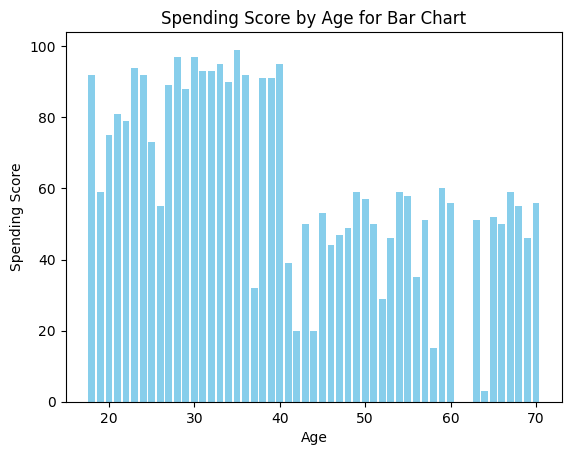

In [13]:
plt.bar(df['Age'], df['Spending Score'], color='skyblue')
plt.title('Spending Score by Age for Bar Chart')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

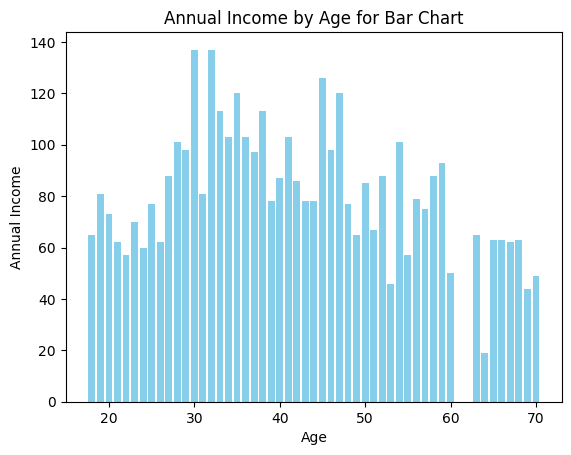

In [14]:
plt.bar(df['Age'], df['Annual Income'], color='skyblue')
plt.title('Annual Income by Age for Bar Chart')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

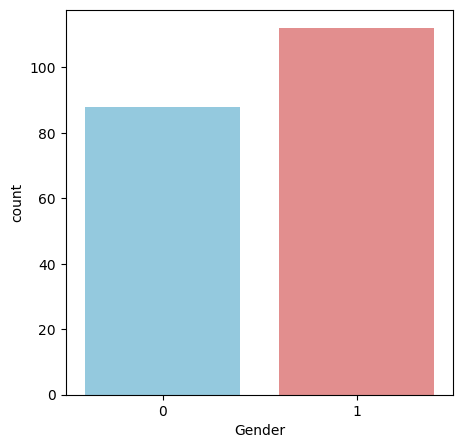

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x="Gender", data=df, palette=['skyblue', 'lightcoral'])
plt.show()


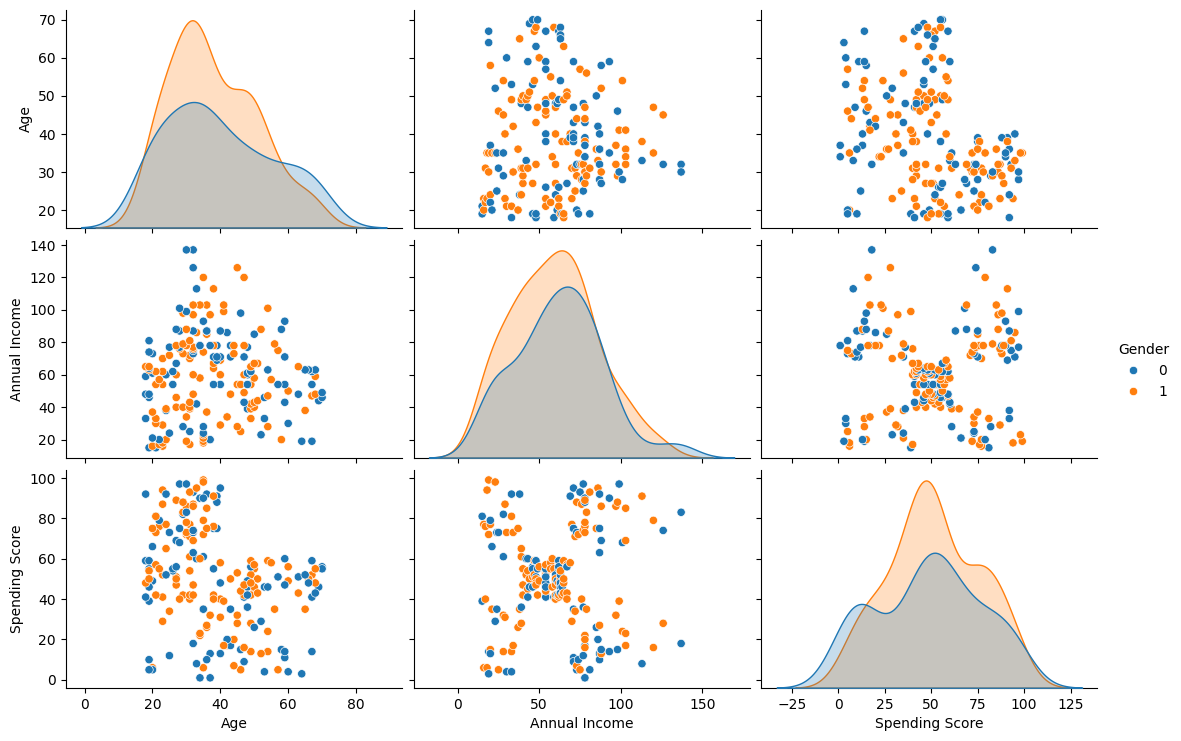

In [16]:
sns.pairplot(df,hue='Gender', aspect=1.5)
plt.show()

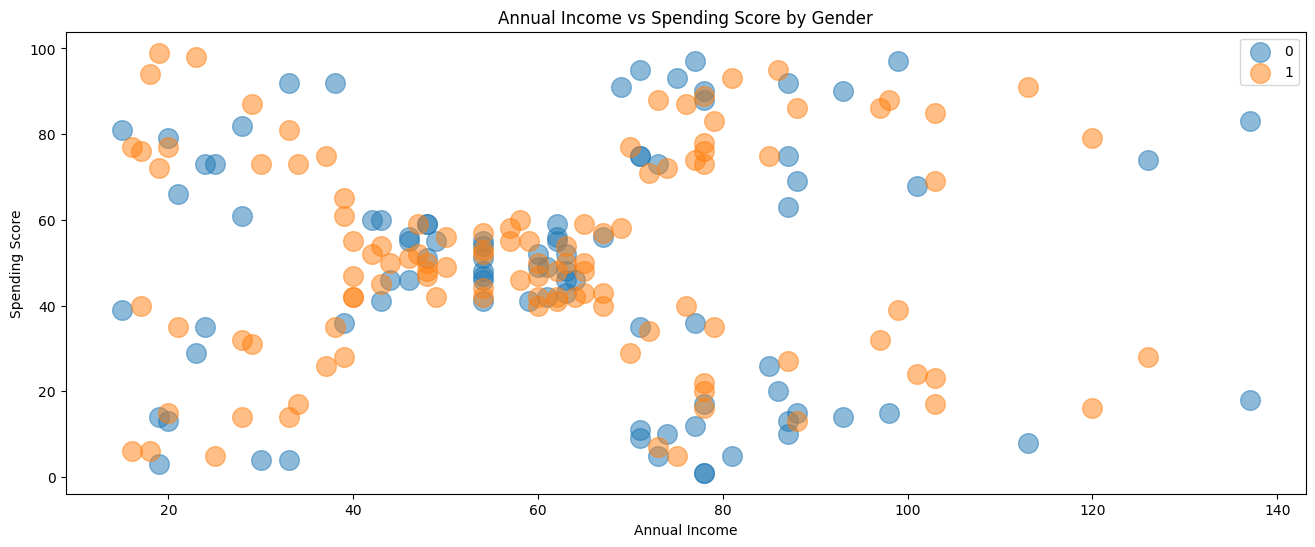

In [17]:
plt.figure(figsize=(16,6))
for gender in[0,1]:
    plt.scatter(x= 'Annual Income', y='Spending Score',
                data=df[df['Gender']==gender] ,s=200, alpha=0.5, label=gender)
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Clustering using K-means 

In [18]:
X1= df[['Annual Income', 'Spending Score']]
inertia=[]
for n in range(1, 11):
    algorithm= (KMeans(n_clusters= n ,init='k-means++', n_init=10, max_iter=300,
                      tol=0.0001, random_state= 111, algorithm ='elkan'))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    

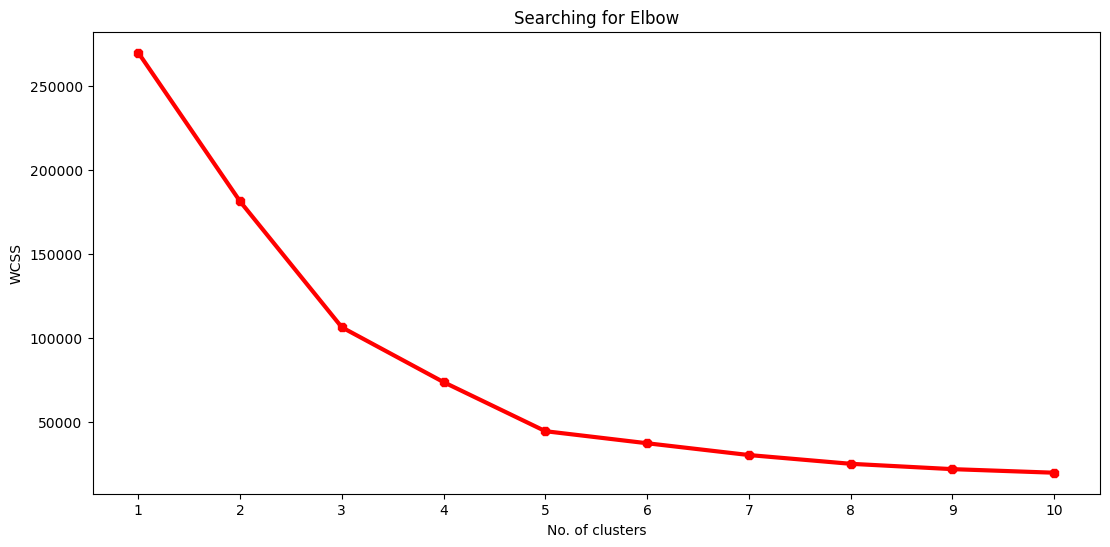

In [19]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='red', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()


In [34]:
from sklearn.cluster import KMeans


In [35]:
X1 = df[['Annual Income', 'Spending Score']]
km = KMeans(n_clusters=5)  
km.fit(X1)
y= km.predict(X1)
X1['Label'] = y
X1.head()

,Annual Income,Spending Score,Label
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1


<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

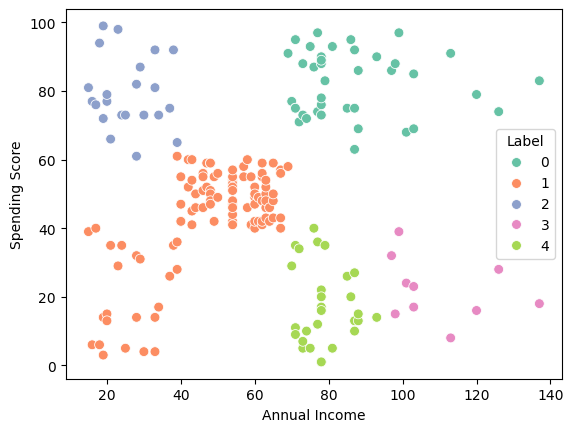

In [36]:
sns.scatterplot(x='Annual Income', y='Spending Score', data=X1, hue='Label', s=50, palette='Set2')


Segmentation using Age and Spending Score

In [37]:
X2 = df[['Age' , 'Spending Score']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

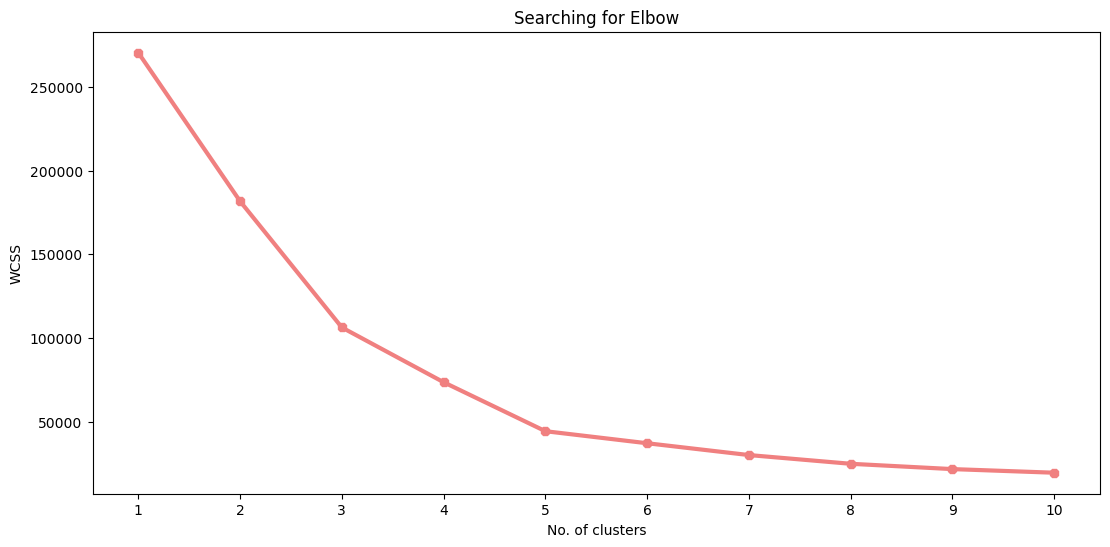

In [38]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='lightcoral', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()
   

In [39]:
km = KMeans(n_clusters=4)
km.fit(X2)
y = km.predict(X2)
X2['Label'] = y
X2.head()

,Age,Spending Score,Label
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2


<AxesSubplot:xlabel='Age', ylabel='Spending Score'>

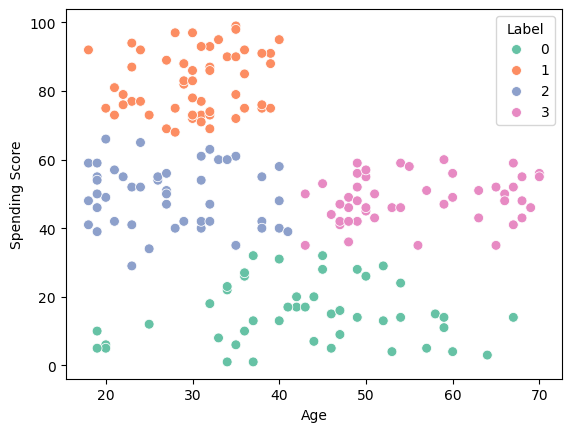

In [41]:
sns.scatterplot(x='Age', y='Spending Score', data=X2, hue='Label', s=50, palette='Set2')

Segmentation using Age , Annual Income and Spending Score

In [43]:
X3 = df[['Age' , 'Annual Income' ,'Spending Score']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

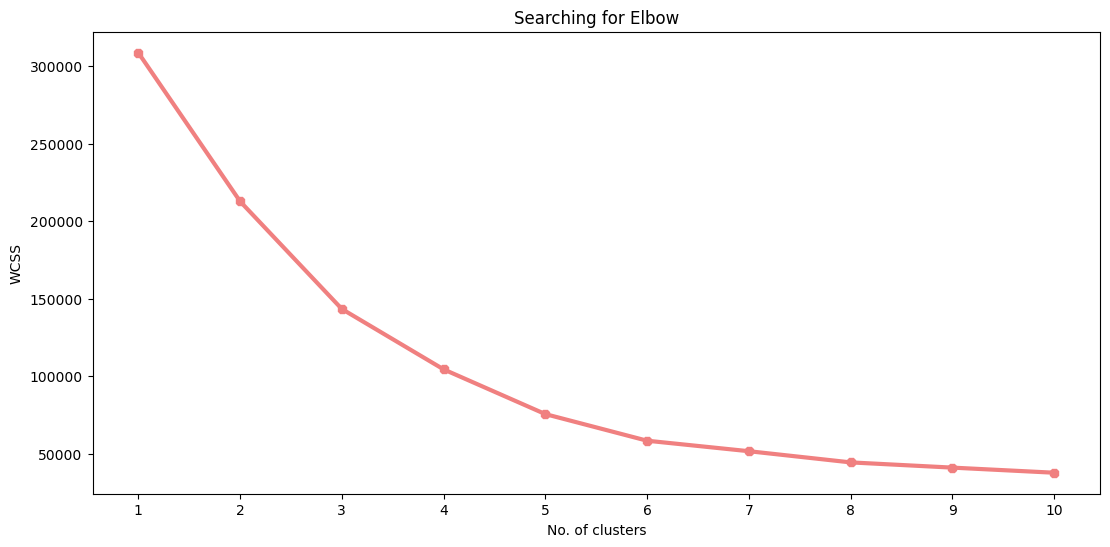

In [44]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), inertia)
plt.plot(range(1,11), inertia, linewidth=3, color='lightcoral', marker='8')
plt.title('Searching for Elbow')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [46]:
km= KMeans(n_clusters=4)
km.fit(X3)
y= km.predict(X3)
X3['Label'] =y 
X3.head()

,Age,Annual Income,Spending Score,Label
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3


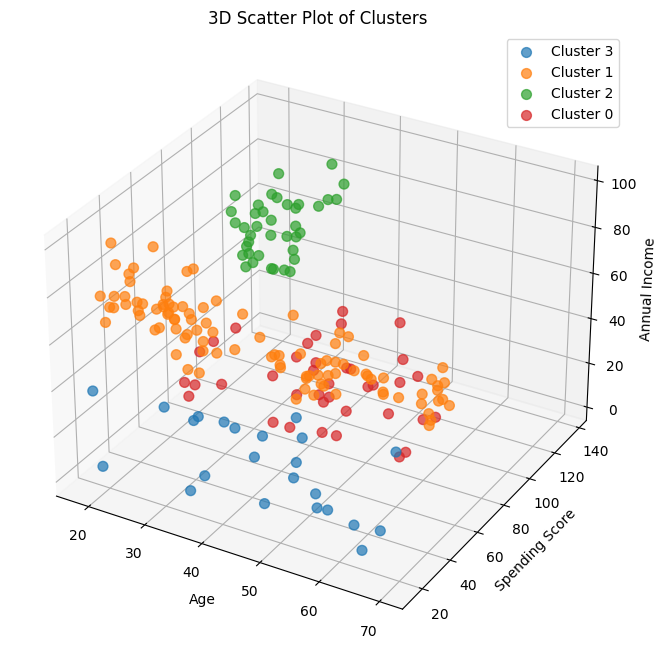

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in X3['Label'].unique():
    cluster_data = X3[X3['Label'] == label]
    ax.scatter(
        cluster_data.iloc[:, 0],  
        cluster_data.iloc[:, 1], 
        cluster_data.iloc[:, 2],  
        label=f'Cluster {label}',
        s=50, alpha=0.7
    )
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()

Agglomerative Hierarchical Clustering

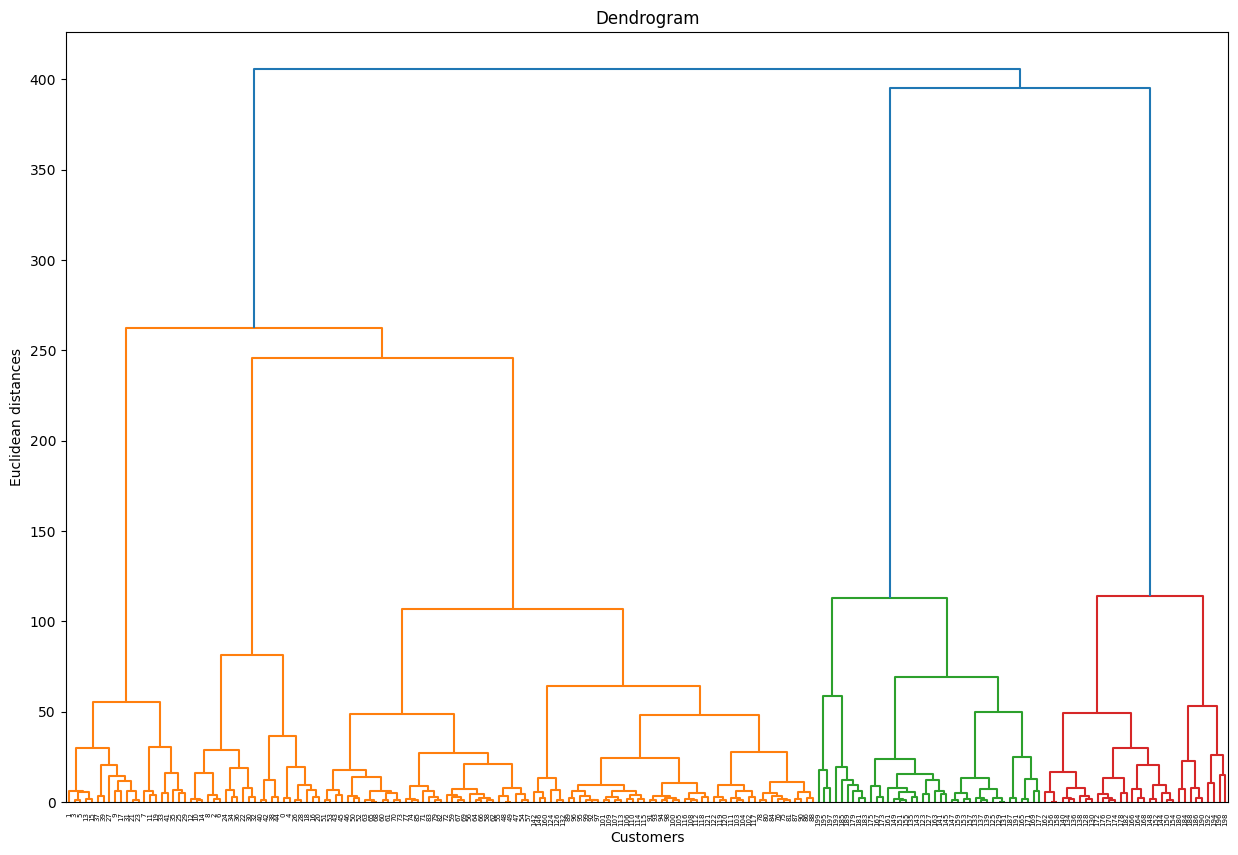

In [49]:
X = df[['Annual Income', 'Spending Score']]
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [52]:
agglom = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='ward')
y = agglom.fit_predict(df)
df['Labels'] = y
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Labels', 
                data=df, palette='Set1')
plt.title('Agglomerative with 5 Clusters')
plt.show()

<class 'TypeError'>: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'